# Import packages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Conv2DTranspose, BatchNormalization
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.metrics import Recall, Precision, Accuracy
from tensorflow.keras.optimizers import Adam

In [3]:
train_data_dir = '../xrays/train'
test_data_dir = '../xrays/test'
val_data_dir = '../xrays/val'

train_generator = ImageDataGenerator(rescale=1./255,
                                     rotation_range=3,
                                     width_shift_range=.05, 
                                     height_shift_range=.05,
                                     shear_range=.05, 
                                     zoom_range=.05).flow_from_directory(train_data_dir, 
                                                                         color_mode = 'grayscale',
                                                                         target_size = (256,256),
                                                                         class_mode = 'binary',
                                                                         seed = 42)

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_dir, 
                                                                        color_mode = 'grayscale',
                                                                        target_size = (256,256),  
                                                                        class_mode = 'binary',
                                                                        shuffle = False)


val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_data_dir, 
                                                                       color_mode = 'grayscale',
                                                                       target_size = (256,256), 
                                                                       class_mode = 'binary',
                                                                       shuffle = False)

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

Found 4616 images belonging to 2 classes.
Found 640 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


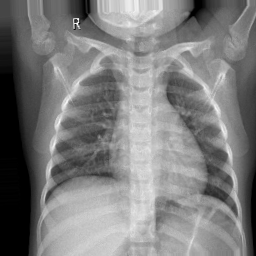

In [4]:
array_to_img(X_train[3])

In [5]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
# initializers Glora / Kaiminghe

In [7]:
# regularization rate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeUniform

In [8]:
from tensorflow.keras.metrics import Recall, Precision, Accuracy



In [9]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeUniform(), input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeUniform()))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_initializer=HeUniform()))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [10]:
class_weights = dict(zip(np.unique(y_train), 
                         class_weight.compute_class_weight(classes=np.unique(y_train), 
                                                           y=y_train, class_weight='balanced')))

In [11]:
from tensorflow.keras.optimizers import Adam

In [12]:
optimizer = Adam(learning_rate=.00005)

In [13]:
num_epochs = 4

model.compile(loss='binary_crossentropy',  optimizer=optimizer, metrics=['acc', Recall(), Precision()])

history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=144,
                    class_weight=class_weights, validation_data=val_generator, validation_steps = 18)

Epoch 1/4
3/3 [==============================] - 15s 6s/step - loss: 0.9684 - acc: 0.5755 - recall: 0.6172 - precision: 0.7766 - val_loss: 0.9293 - val_acc: 0.4792 - val_recall: 1.0000 - val_precision: 0.4792
Epoch 2/4
3/3 [==============================] - 13s 6s/step - loss: 0.5946 - acc: 0.8607 - recall: 1.0000 - precision: 0.8607 - val_loss: 0.7318 - val_acc: 0.4792 - val_recall: 1.0000 - val_precision: 0.4792
Epoch 3/4
3/3 [==============================] - 13s 6s/step - loss: 0.5248 - acc: 0.7031 - recall: 0.7717 - precision: 0.8517 - val_loss: 0.6534 - val_acc: 0.5208 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/4
3/3 [==============================] - 13s 6s/step - loss: 0.6795 - acc: 0.4714 - recall: 0.4270 - precision: 0.7938 - val_loss: 0.5750 - val_acc: 0.7587 - val_recall: 0.9891 - val_precision: 0.6675


In [14]:
history.history

{'loss': [1.0014814138412476,
  0.650625467300415,
  0.5711866021156311,
  0.6741127967834473],
 'acc': [0.5104166865348816, 0.8541666865348816, 0.59375, 0.5520833134651184],
 'recall': [0.5205479264259338, 1.0, 0.6202531456947327, 0.5416666865348816],
 'precision': [0.7599999904632568,
  0.8541666865348816,
  0.8448275923728943,
  0.795918345451355],
 'val_loss': [0.9292618632316589,
  0.7317923307418823,
  0.6533631682395935,
  0.5750405788421631],
 'val_acc': [0.4791666567325592,
  0.4791666567325592,
  0.5208333134651184,
  0.7586805820465088],
 'val_recall': [1.0, 1.0, 0.0, 0.989130437374115],
 'val_precision': [0.4791666567325592,
  0.4791666567325592,
  0.0,
  0.6674816608428955]}

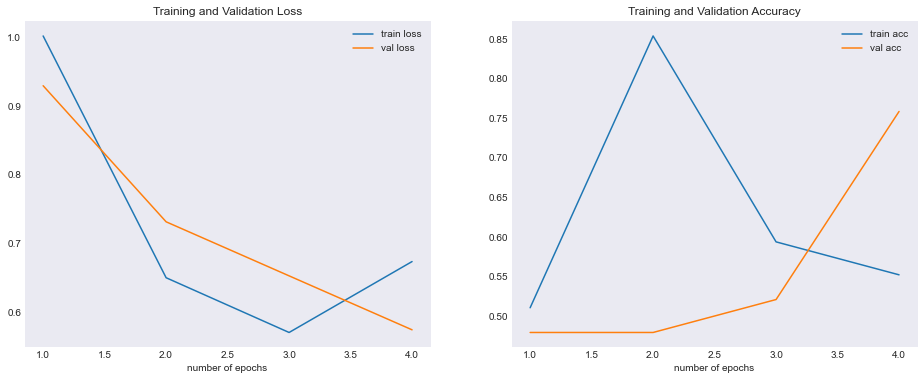

In [26]:
def plot_model(history, epochs):
    plt.style.use('seaborn-dark')
    fig = plt.figure(figsize=(16,6))
    
    #visualize loss
    ax1 = fig.add_subplot(121)
    plt.plot(range(1, epochs+1), history.history['loss'], label='train loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'], label= 'val loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('number of epochs')
    plt.legend()

    
    # visualize accuracy
    ax2 = fig.add_subplot(122)
    plt.plot(range(1, epochs+1), history.history['acc'], label = 'train acc')
    plt.plot(range(1, epochs+1), history.history['val_acc'], label = 'val acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('number of epochs')
    plt.legend()

    
plot_model(history, num_epochs)

In [40]:
model.evaluate(test_generator)

20/20 [==============================] - 9s 422ms/step - loss: 0.5929 - acc: 0.8078 - recall: 0.9899 - precision: 0.7680


[0.5928894281387329, 0.807812511920929, 0.9899497628211975, 0.7680311799049377]

In [ ]:
# test_generator.reset()
# y_pred = model.predict(test_generator) > 0.5
# classes = test_generator.classes[test_generator.index_array]


In [34]:
y_true = test_generator.classes
y_pred = model.predict(test_generator) > 0.5

In [35]:
y_pred.squeeze().shape

(640,)

In [36]:
# con_mat = tf.math.confusion_matrix(y_test_full, y_pred).numpy()
# con_mat_df = pd.DataFrame(con_mat, index=['norm', 'pneum'], columns=['norm', 'pneum'])

In [37]:
confusion_matrix(y_true, y_pred)

array([[123, 119],
       [  4, 394]])

In [38]:
len(y_pred)

640

In [ ]:
pca_model = models.Sequential()

pca_model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(256, 256, 1)))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
pca_model.add(MaxPooling2D((2, 2)))

pca_model.add(Flatten())
pca_model.add(Dropout(0.5))
pca_model.add(Dense(512, activation='relu'))
pca_model.add(Dense(1, activation='sigmoid'))

pca_model.summary()